In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [2]:
# import data from text file
import pandas as pds

ge_data = pds.read_csv("SuperCDMS/PhysRevD.99.062001-data/MarchAprilData.txt", skiprows=1, \
                         names=['time', 'blah'], \
                         delim_whitespace=True)

ge_data = ge_data.sort_values(by='time')

print (ge_data.head(10))

t = np.asarray(ge_data["time"])

print(t)


      time    blah
0  18.2372  5.7520
1  18.8376  4.8699
2  21.7213  4.5819
3  31.5173  3.8949
4  36.6141  6.6432
5  36.6904  3.9877
6  45.3014  4.5169
7  48.1338  6.0118
8  48.7492  4.6097
9  50.4288  6.1974
[ 18.2372  18.8376  21.7213  31.5173  36.6141  36.6904  45.3014  48.1338
  48.7492  50.4288  52.7217  53.9111  56.1508  56.2173  59.679   69.4655
  71.121   71.1536  71.7612  75.7067  80.9625  90.1659  91.9344  97.5635
  98.7398  98.8626 105.7986 109.6564 115.9719 122.3531 122.3688 129.7848
 145.3656 154.5399 155.056  158.46   161.501  161.5471 164.3523 167.8639
 187.9183 193.644  193.6921 198.2449 199.9381 221.2375 224.1241 226.9514
 229.3153 230.4419 236.1751 236.2114 247.7683 253.974  256.9856 264.9927
 267.1889 269.5581 281.0375 283.9651 295.9893 301.8082 318.9888 320.1623
 321.2511 339.1798 342.6682 350.0989 362.1782 368.4681 382.8771 383.5163
 397.2984 404.0691 409.8674 414.4948 423.0932 435.6958 466.3569 484.1083
 492.6699 512.2114 523.7915 542.7048 545.6524 557.0962 558.23

In [3]:
#make histos


tbins = np.linspace(0,720,100)
xcq = (tbins[:-1] + tbins[1:]) / 2
n,nx = np.histogram(t,bins=tbins)

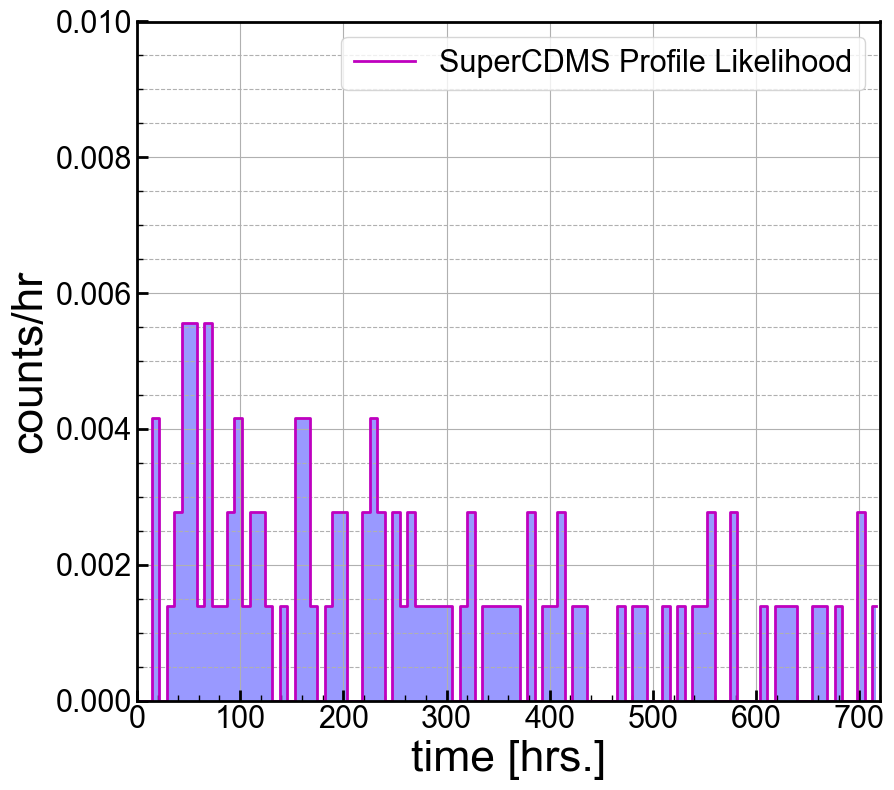

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq)[0]


#print(estring)
ax1.step(xcq,thist, where='mid',color='m', linestyle='-', \
            label='SuperCDMS Profile Likelihood', linewidth=2)


ymin = 0.0
ymax = 0.01

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 720) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'time [hrs.]')
ax1.set_ylabel('counts/hr')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
#make histos (counts per day)


tbins = np.linspace(0,30,100)
xcq = (tbins[:-1] + tbins[1:]) / 2
n,nx = np.histogram((t/24.0),bins=tbins)

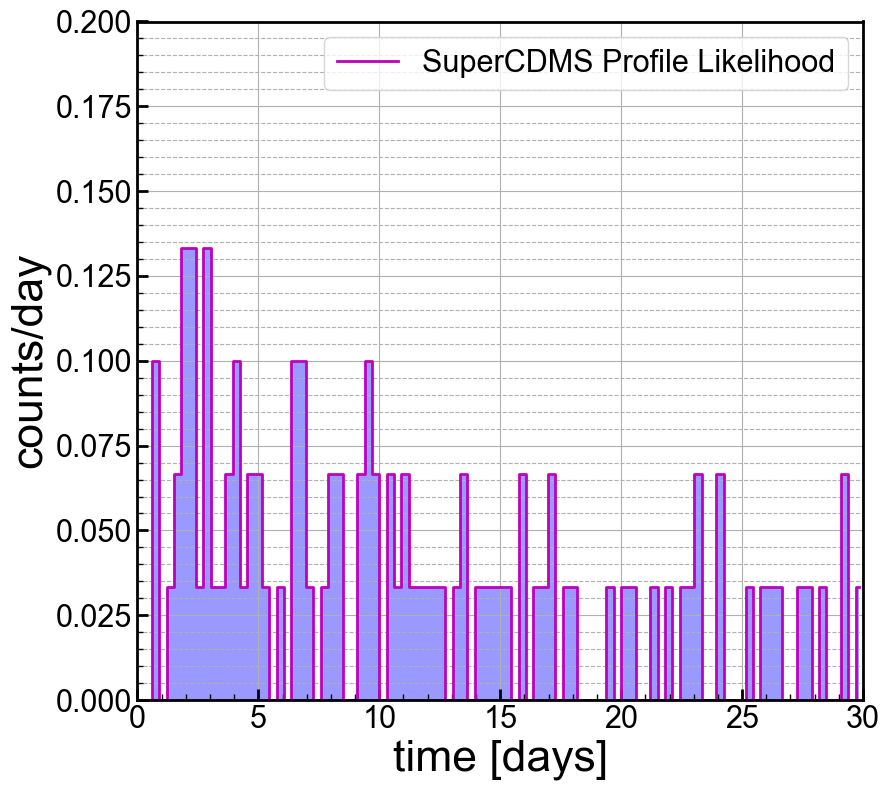

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq)[0]


#print(estring)
ax1.step(xcq,thist, where='mid',color='m', linestyle='-', \
            label='SuperCDMS Profile Likelihood', linewidth=2)


ymin = 0.0
ymax = 0.2

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 30) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'time [days]')
ax1.set_ylabel('counts/day')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()